In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpjyhu3io2GP2
Verbose mode active!


In [4]:
C = gp2.KUC_UNet2D(workingdir=R.workingdir)

*** GP2  KUNet2D ***
Working directory: /tmp/tmpjyhu3io2GP2


In [5]:
R.classifier = C

In [6]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [7]:
images.shape

(10000, 512, 512, 1)

In [8]:
masks.shape

(10000, 512, 512, 1)

In [9]:
R.run(images=images, masks=masks, runs=2, batch_size=16)

Weights OK!
******
Loop 1
****** TRAINING CLASSIFIER ******
Epoch 1/100
32/32 [==============================] - 33s 727ms/step - loss: 0.2783 - dice_coeff: 0.5151 - val_loss: 0.4170 - val_dice_coeff: 0.7702
Epoch 2/100
32/32 [==============================] - 15s 488ms/step - loss: 0.1398 - dice_coeff: 0.7894 - val_loss: 0.0816 - val_dice_coeff: 0.8693
Epoch 3/100
32/32 [==============================] - 15s 486ms/step - loss: 0.0704 - dice_coeff: 0.8484 - val_loss: 0.0774 - val_dice_coeff: 0.7744
Epoch 4/100
32/32 [==============================] - 15s 490ms/step - loss: 0.0567 - dice_coeff: 0.8688 - val_loss: 0.0510 - val_dice_coeff: 0.8542
Epoch 5/100
32/32 [==============================] - 16s 503ms/step - loss: 0.0457 - dice_coeff: 0.8941 - val_loss: 0.0424 - val_dice_coeff: 0.9126
Epoch 6/100
32/32 [==============================] - 16s 493ms/step - loss: 0.0437 - dice_coeff: 0.8993 - val_loss: 0.0353 - val_dice_coeff: 0.9220
Epoch 7/100
32/32 [==============================] -

In [10]:
R.classifier_scores

[[0.04706137627363205, 0.9196072220802307],
 [0.03704677149653435, 0.9027859568595886]]

In [11]:
R.discriminator_scores

[[0.8386660218238831, 0.5566666722297668],
 [0.8487899303436279, 0.5683333277702332]]

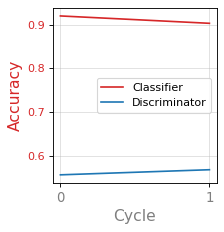

In [12]:
R.plot()

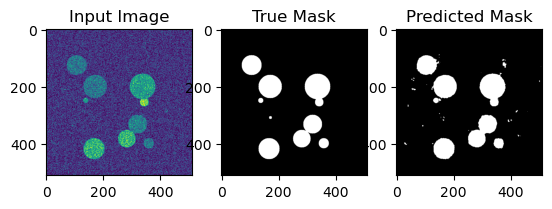

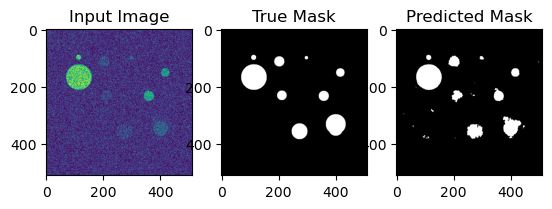

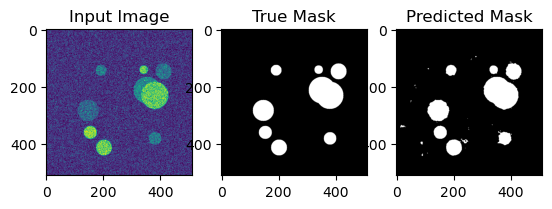

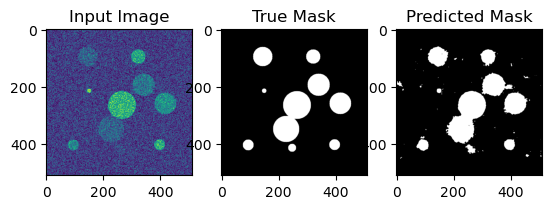

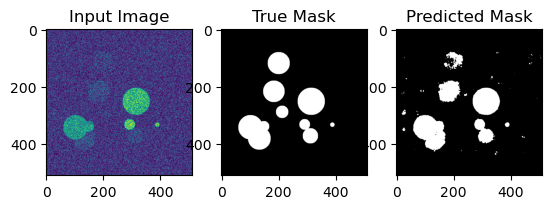

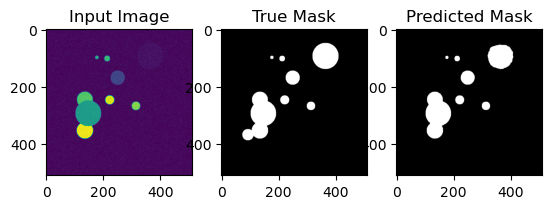

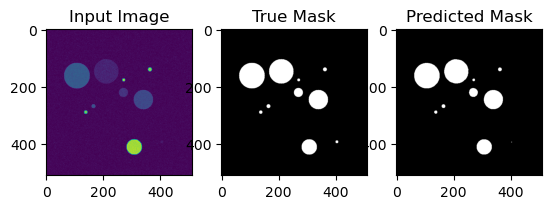

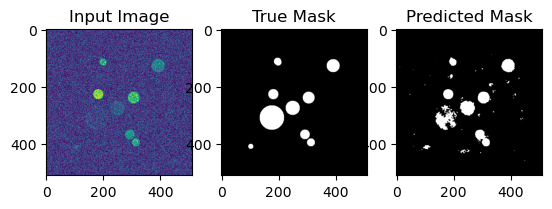

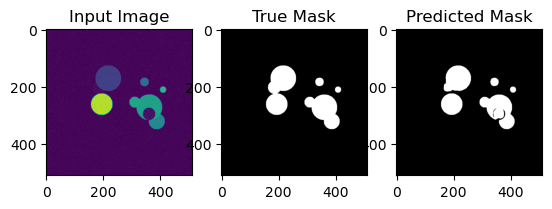

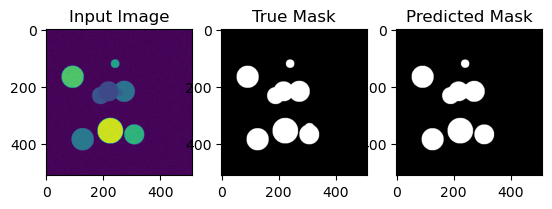

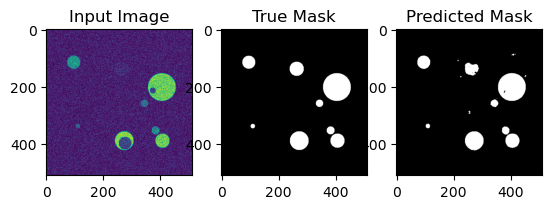

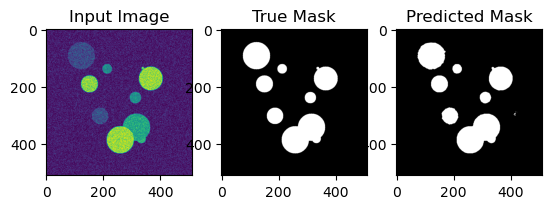

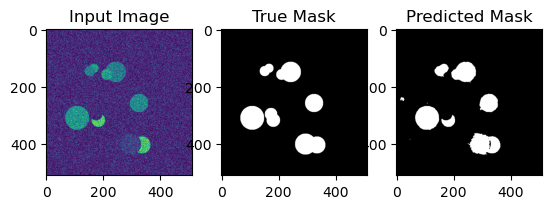

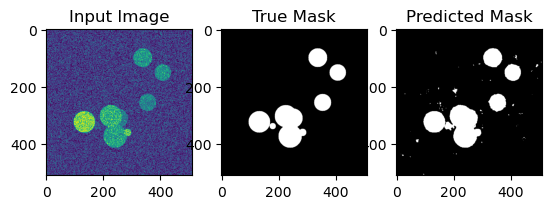

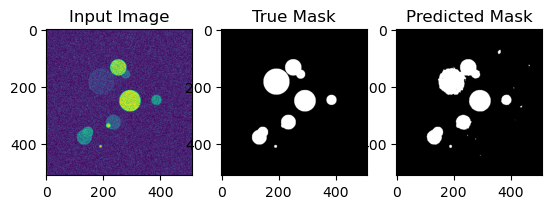

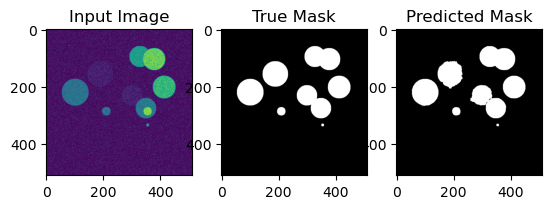

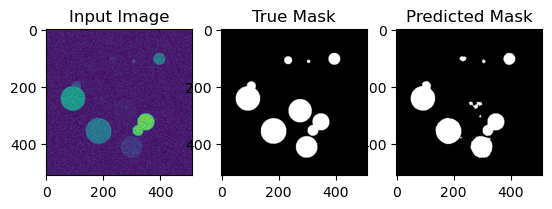

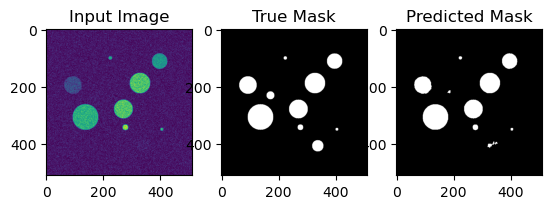

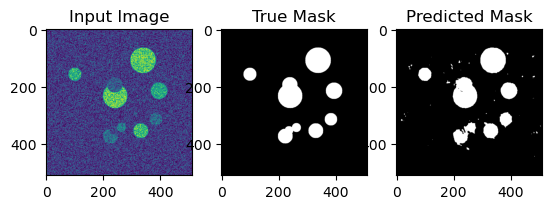

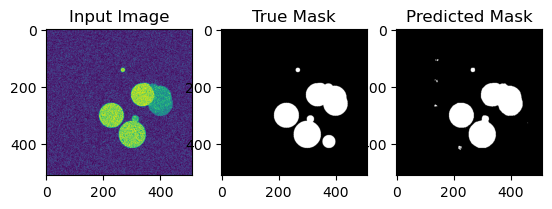

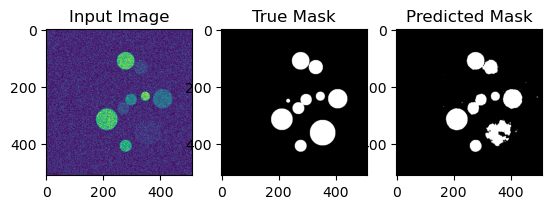

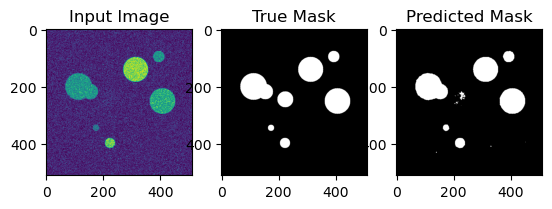

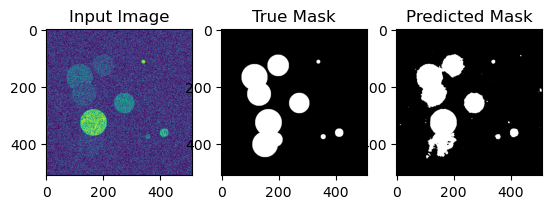

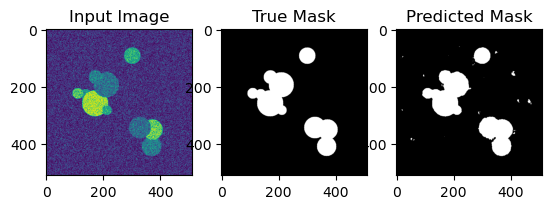

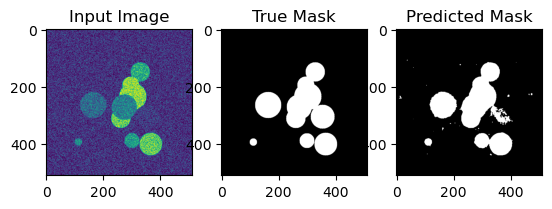

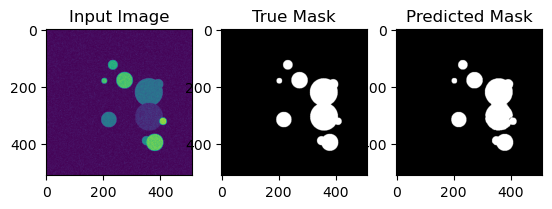

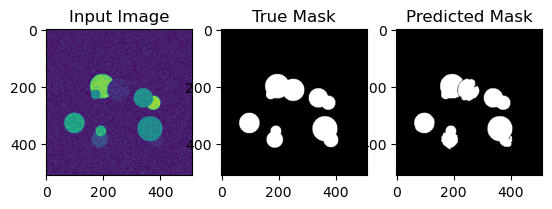

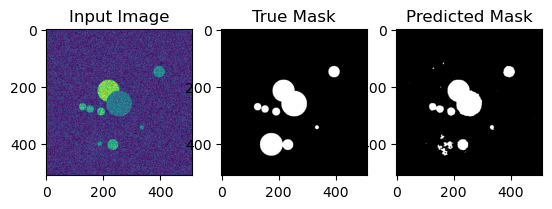

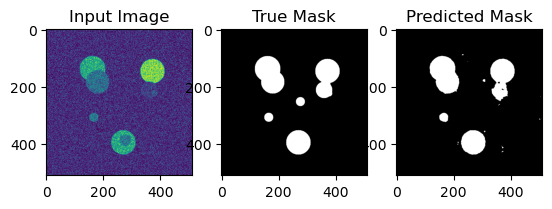

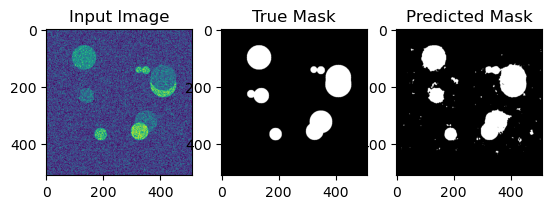

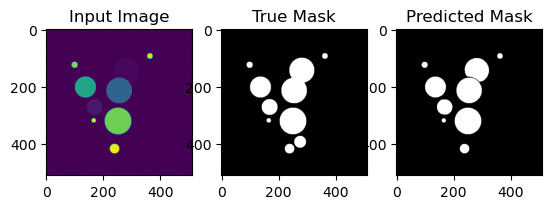

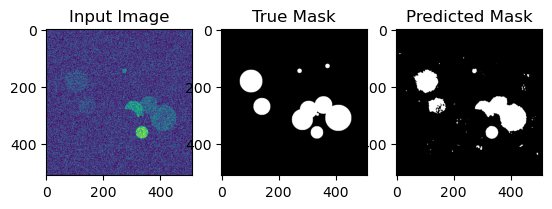

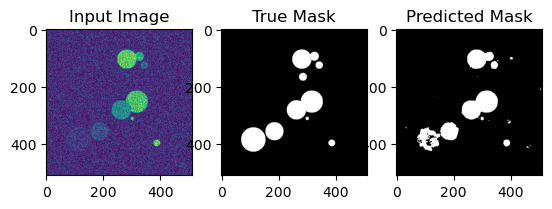

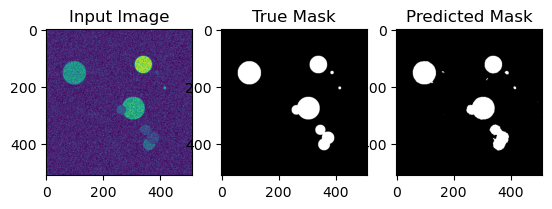

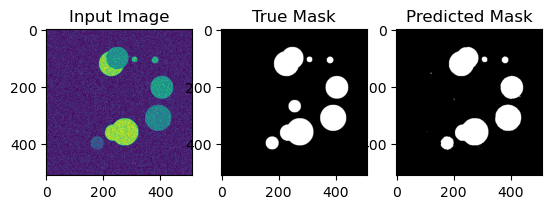

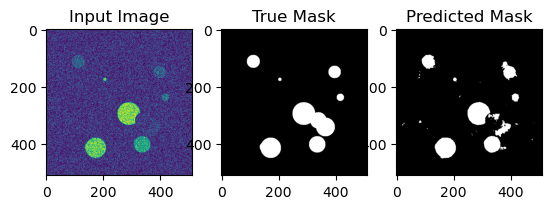

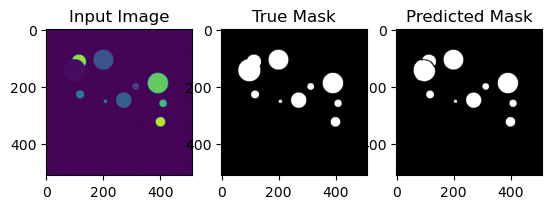

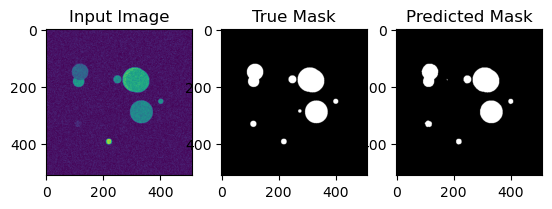

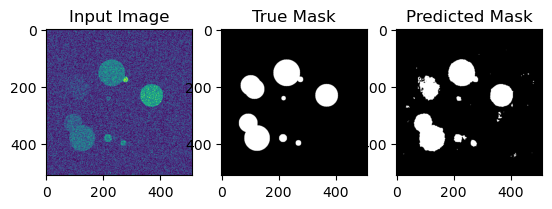

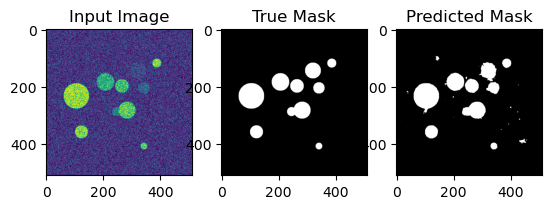

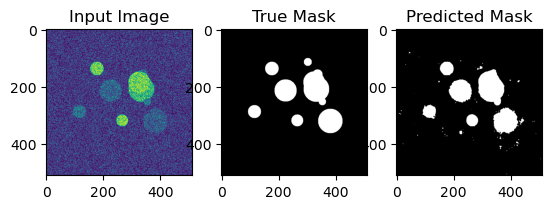

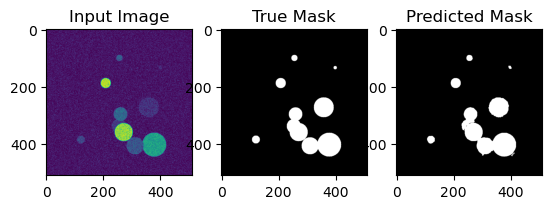

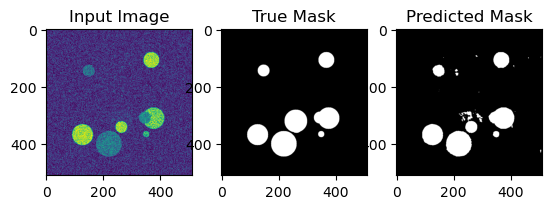

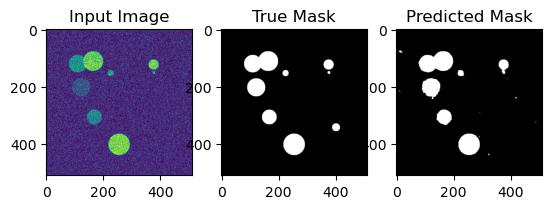

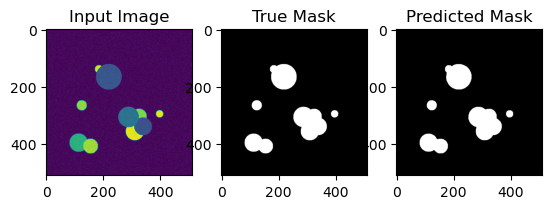

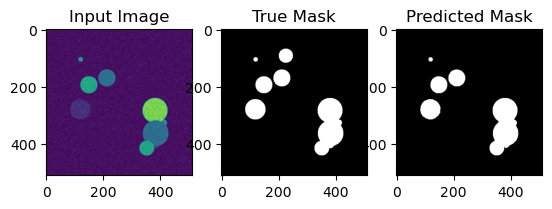

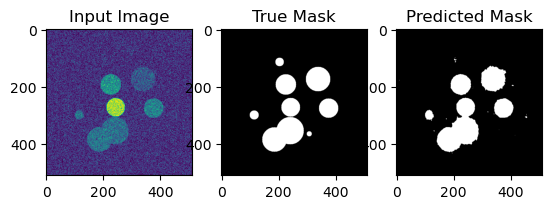

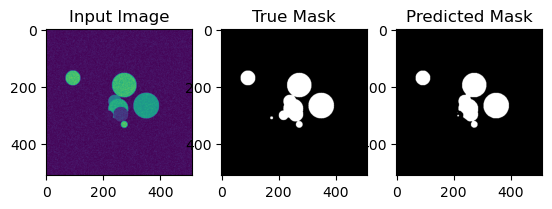

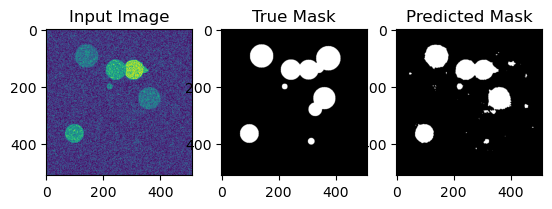

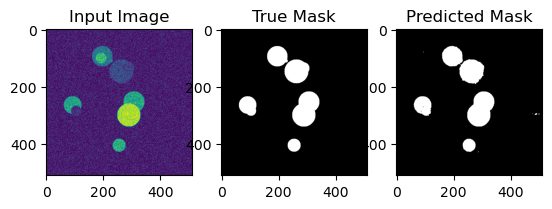

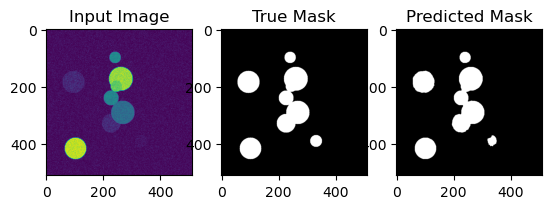

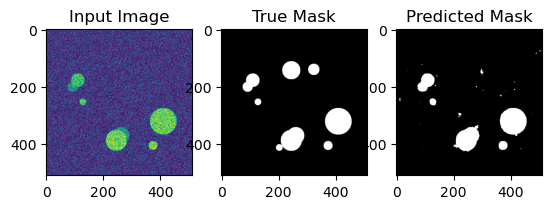

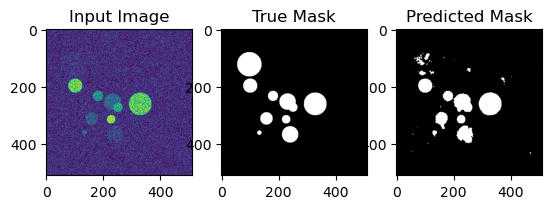

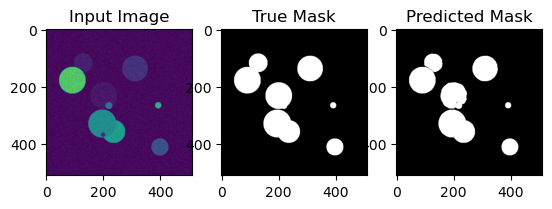

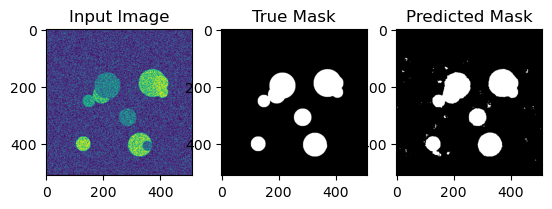

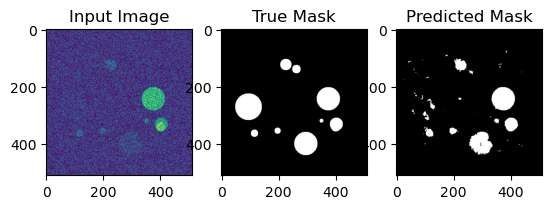

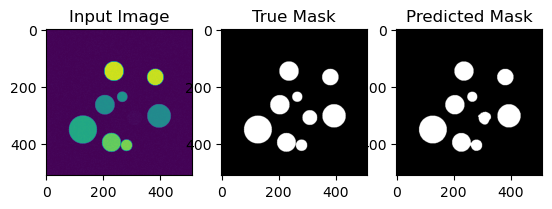

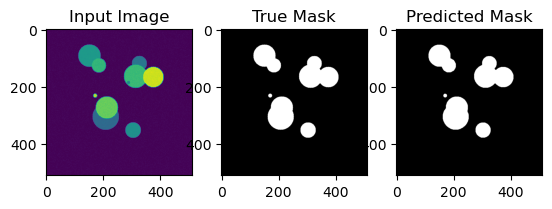

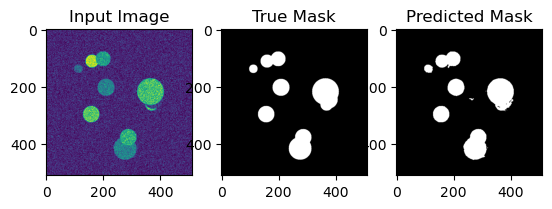

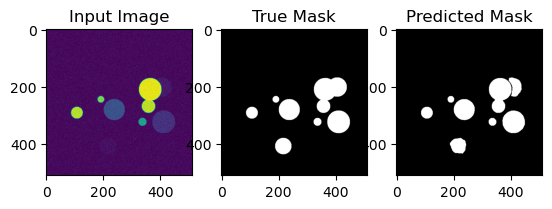

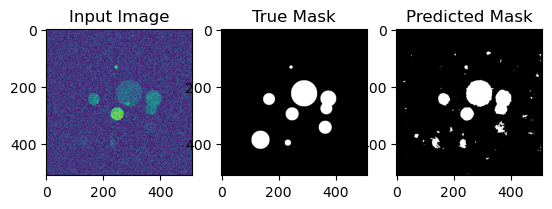

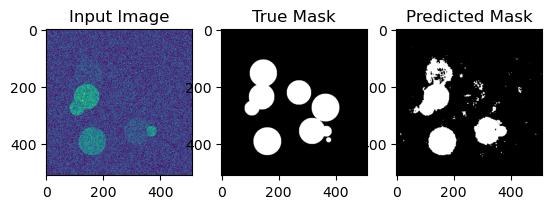

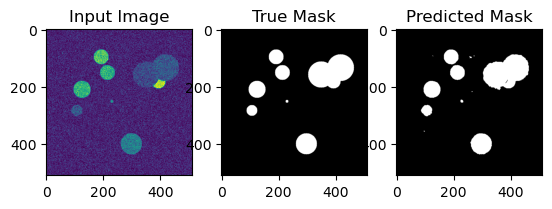

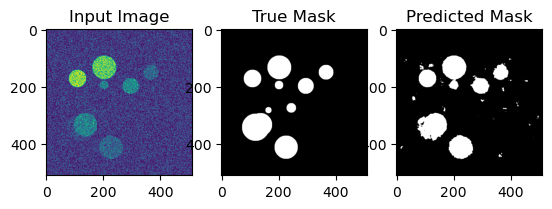

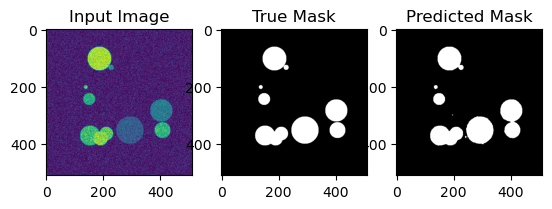

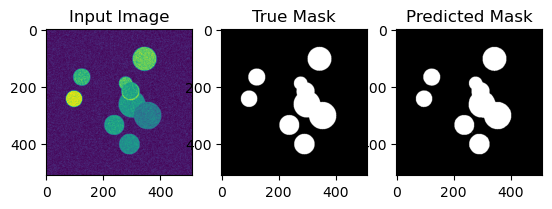

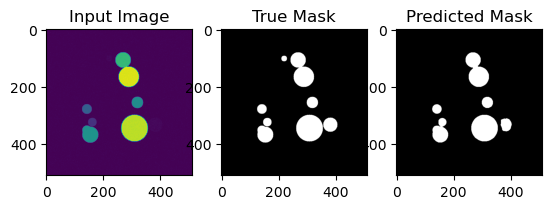

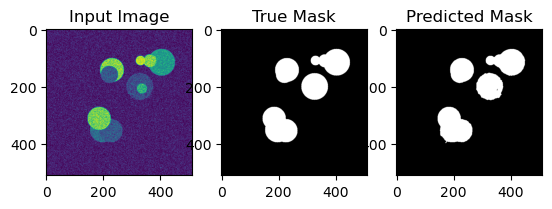

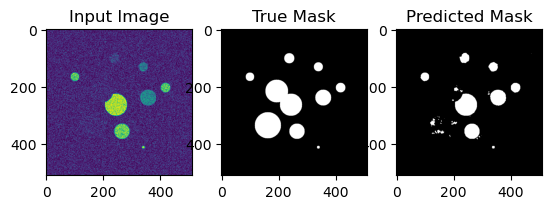

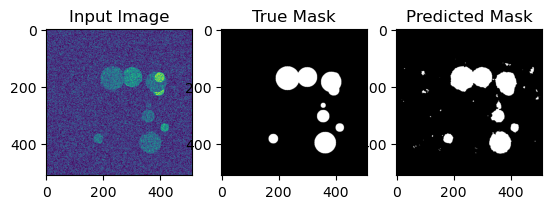

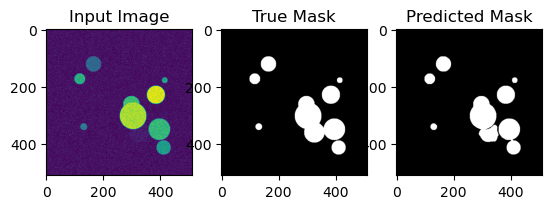

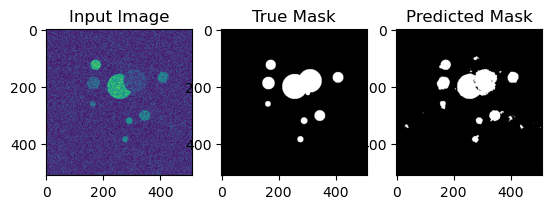

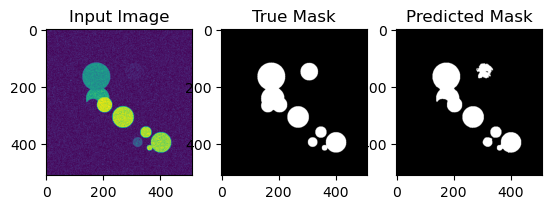

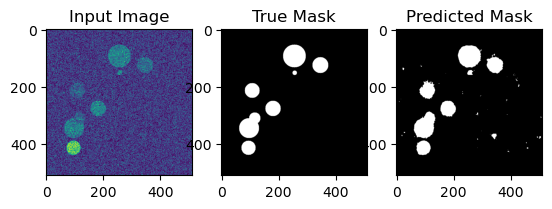

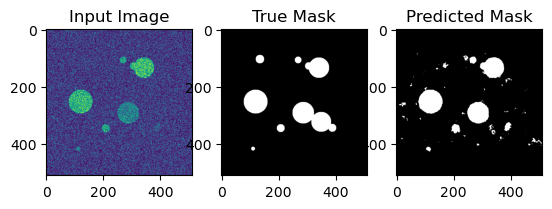

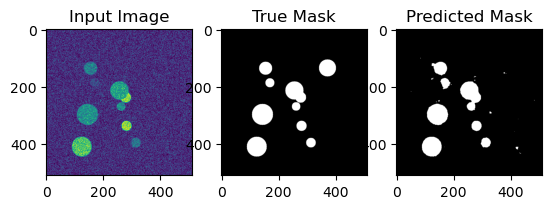

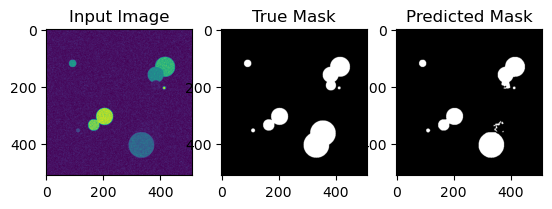

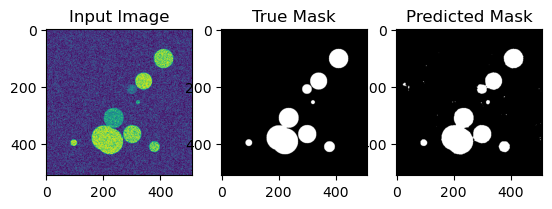

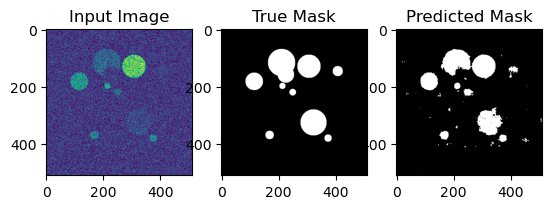

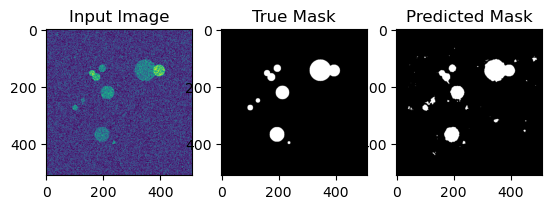

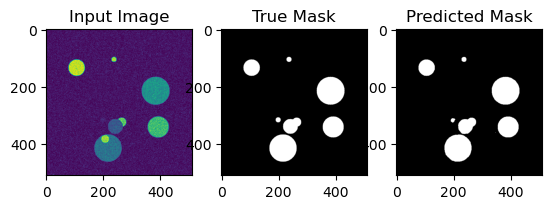

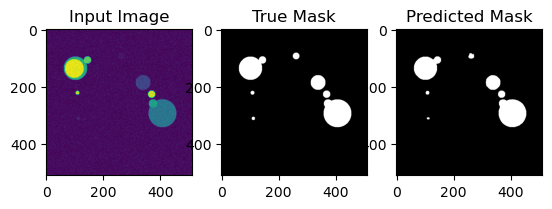

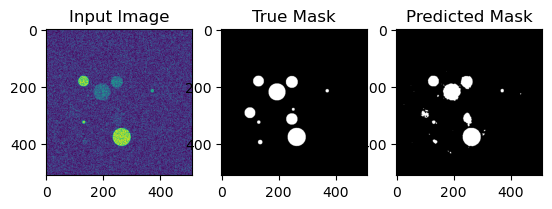

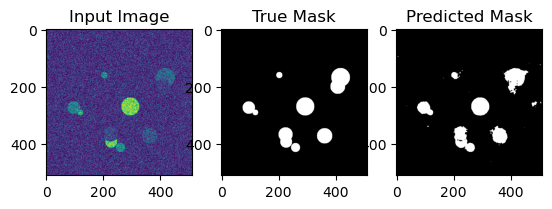

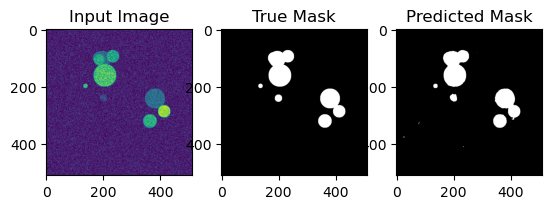

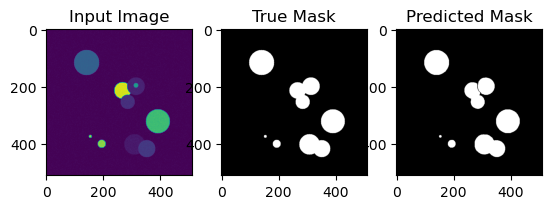

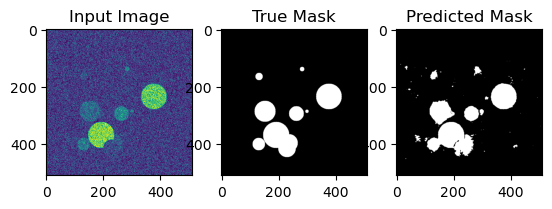

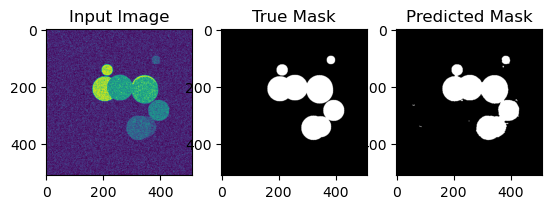

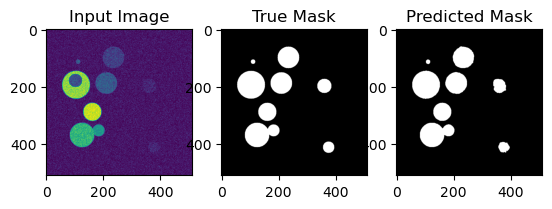

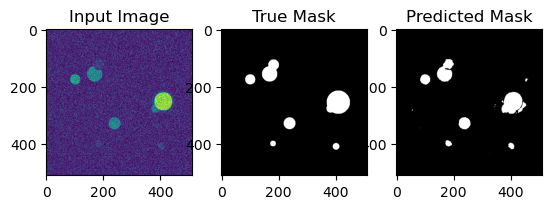

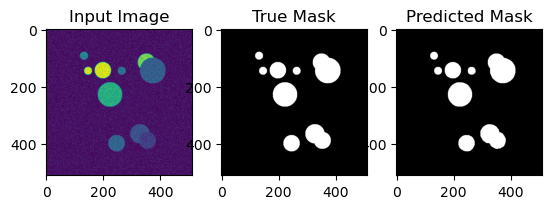

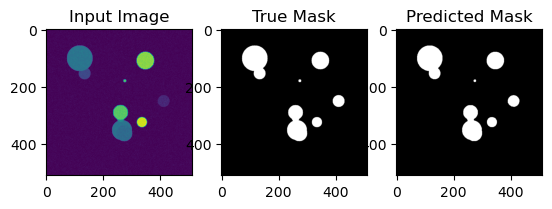

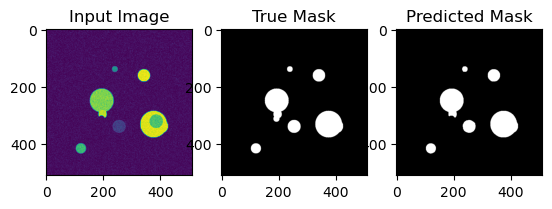

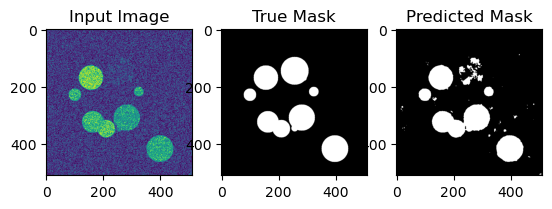

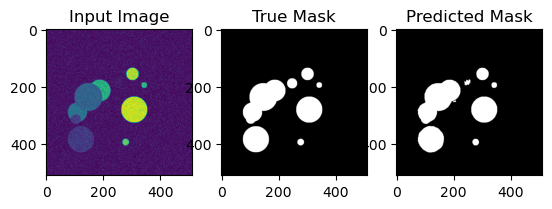

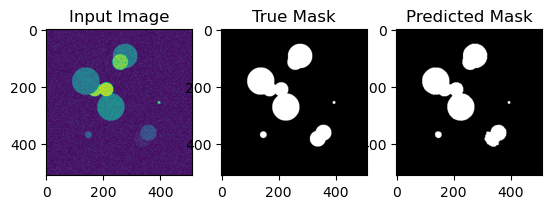

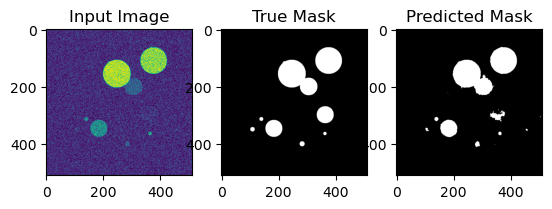

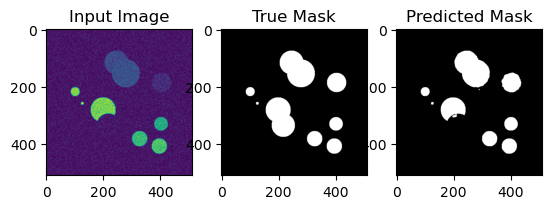

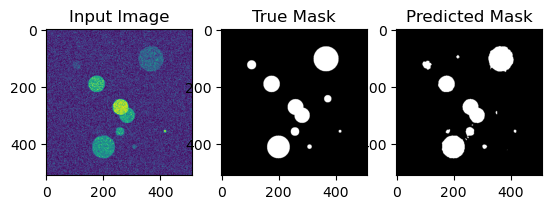

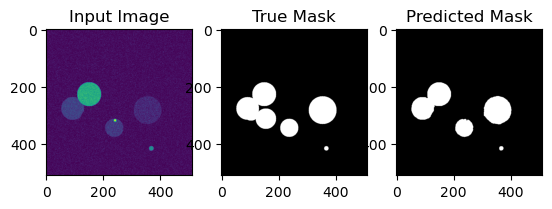

In [13]:
gp2.Util.visualize_predictions(C, images, masks)